In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:

inputfilename='banknifty.xlsx'

In [44]:
!pip install xlrd

You should consider upgrading via the 'c:\users\lavanya\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [45]:
df = pd.read_excel(inputfilename,index_col='Date')
df.head()

Price      Open      High       Low
Date                                              
2020-02-28  29495.75  29525.70  29562.00  29436.80
2020-02-27  30187.00  30270.00  30271.95  29914.15
2020-02-26  30306.85  30279.95  30515.35  30131.75
2020-02-25  30432.70  30517.00  30610.70  30329.95
2020-02-24  30455.10  30666.35  30702.15  30428.00

In [46]:
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

In [47]:
df.sort_values(['Date'], axis=0, ascending=True, inplace=True)
df.head()

Price      Open      High       Low
Date                                              
2017-01-02  17969.60  18242.30  18249.00  17844.90
2017-01-03  18035.60  18002.75  18115.05  17830.95
2017-01-04  17891.00  18037.45  18092.85  17868.90
2017-01-05  18115.95  18000.75  18164.05  17977.80
2017-01-06  18264.00  18168.45  18325.50  18157.30

In [48]:
df['Close'] = df['Price']
df.head()

Price      Open      High       Low     Close
Date                                                        
2017-01-02  17969.60  18242.30  18249.00  17844.90  17969.60
2017-01-03  18035.60  18002.75  18115.05  17830.95  18035.60
2017-01-04  17891.00  18037.45  18092.85  17868.90  17891.00
2017-01-05  18115.95  18000.75  18164.05  17977.80  18115.95
2017-01-06  18264.00  18168.45  18325.50  18157.30  18264.00

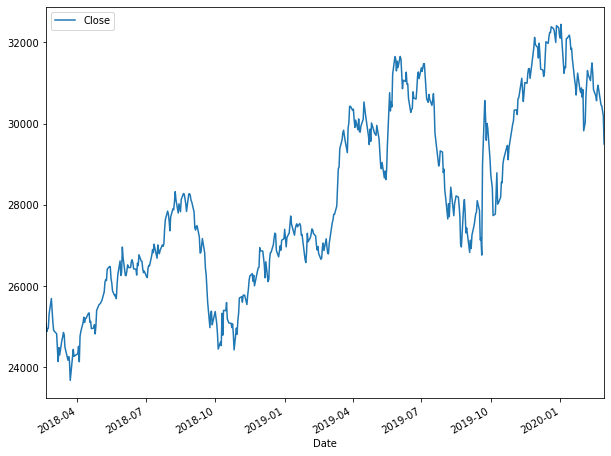

In [49]:
#GRAPH_1
df[['Close']].tail(500).plot(figsize=(10,8))

In [50]:
df['EMA13'] = df['Close'].ewm(span=13,min_periods=0,adjust=False,ignore_na=False).mean()

In [ ]:
!pip install cufflinks plotly

In [ ]:
!pip install chart-studio

In [53]:
# Standard plotly imports
#import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [55]:
df1 = df.tail(400)
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df1.index, y=df1.Close, name='Close',
                         line=dict(color='black', width=2)))

fig.add_trace(go.Scatter(x=df1.index, y=df1.EMA13, name='EMA_13',
                          line=dict(color='firebrick', width=2,dash='dashdot')))

fig.show()